<div style="display: flex; justify-content: flex-end; align-items: center;">
    <div style="width: 30%; text-align: right; margin-right: 20px;">
        <img src="https://www.juntadeandalucia.es/datosabiertos/portal/uploads/group/2022-09-06-135504.979247fps.png" alt="Web Fundación Progreso y Salud" style="width: 100%;"/>
    </div>
    <div style="width: 60%; margin-right: 1em;">
        <p style="text-align: right; font-weight: bold; font-size: 2em; margin-top: 30px;">
            Descriptive analysis
        </p>
        <p style="text-align: right; color: #666">
            Proyect: MedicoderMESH
        </p>
        <p style="text-align: right; color: #666">
            Juan Luis González Rodríguez
        </p>
    </div>
</div>

Exploratory MESH Corpus analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from transformers import BertTokenizerFast

/home/juanluisgonzalez/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
df =  pd.read_csv('../data/projects_pubmed.csv', quotechar='"', skipinitialspace=True)

In [4]:
row1 = df.iloc[0]

In [5]:
print('PMID:', row1['PMID'])
print('MESH_MAJOR_TOPIC:', row1['MESH_MAJOR_TOPIC'])
print('TITLE:', row1['TITLE'])
print('ABSTRACT:', row1['ABSTRACT'])
print('MESH_TUPLE:', row1['MESH_TUPLE'])

PMID: 27041066
MESH_MAJOR_TOPIC: Abdomen, Acute
TITLE: Urgencias abdominales en pediatría
ABSTRACT: La sintomatología abdominal es uno de los motivos de consulta más frecuente en la urgencia pediátrica, siendo el dolor abdominal el síntoma más referido. Habitualmente, para el diagnóstico es suficiente con una anamnesis y exploración física precisas. Para el radiólogo es útil conocer cuáles son las patologías abdominales más frecuentes por franjas de edad, lo cual permite acotar el diagnóstico diferencial. Cuando esté indicado realizar alguna prueba de imagen, la ecografía es la técnica inicial en la mayoría de los casos; permite realizar el diagnóstico o añadir información relevante, con las ventajas conocidas de esta técnica. La radiografía simple hoy en día queda reservada cuando existe sospecha de perforación, obstrucción intestinal o ingesta de cuerpo extraño. Conviene recordar, que el dolor abdominal puede ser secundario a una neumonía basal. La TC queda reservada para indicacione

In [6]:
df.shape

(22934, 5)

# MESH MAJOR TOPIC

In [7]:
n_mesh = len(df['MESH_MAJOR_TOPIC'].unique())
print(f'There are {n_mesh} uniques MESH terms in the corpus.')

There are 3078 uniques MESH terms in the corpus.


In [8]:
pubs_per_mesh = df['MESH_MAJOR_TOPIC'].value_counts().value_counts().sort_index().rename("publications_per_mesh")
pubs_per_mesh.rename_axis('n_publications')

n_publications
1     669
2     473
3     314
4     218
5     182
6     148
7     116
8     102
9     102
10     86
11     67
12     61
13     53
14     34
15     34
16     37
17     27
18     36
19     28
20     25
21     27
22     17
23     13
24     14
25     15
26     16
27     12
28      9
29     17
30     14
31      6
32      7
33      8
34      8
35      5
36      3
37      7
38      3
39      4
40      7
41      4
42      5
43      3
44      1
45      3
46      6
47      4
48      4
49      6
50     18
Name: publications_per_mesh, dtype: int64

In [9]:
pubs_per_mesh.sum()

3078

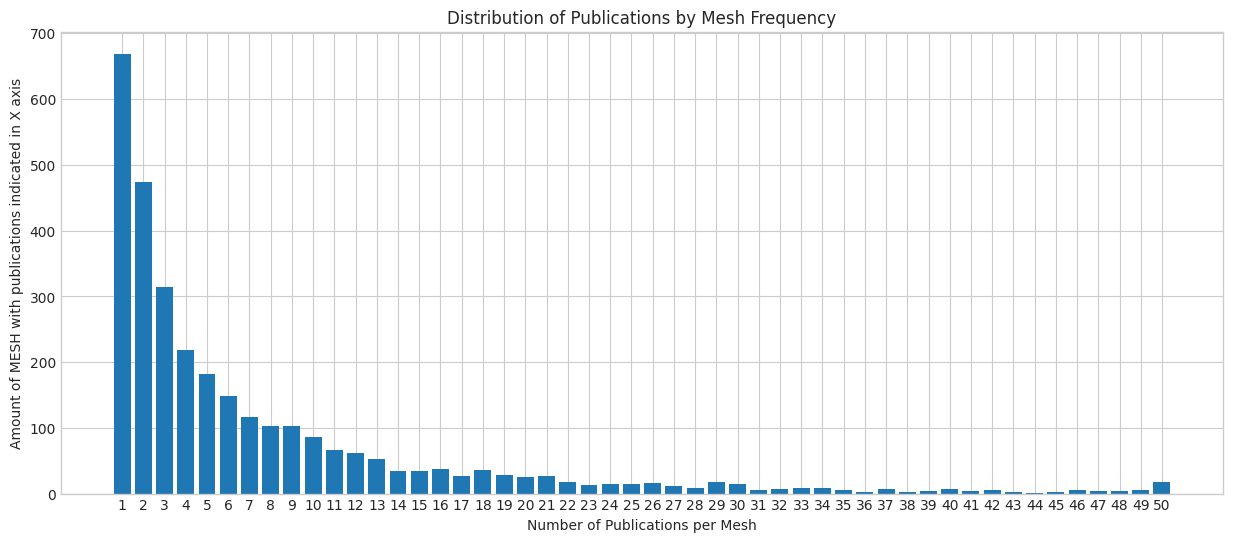

In [10]:
fig = plt.figure(figsize=(15, 6))

plt.bar(pubs_per_mesh.index, pubs_per_mesh)
plt.xticks(pubs_per_mesh.index)

plt.xlabel('Number of Publications per Mesh')
plt.ylabel('Amount of MESH with publications indicated in X axis')
plt.title('Distribution of Publications by Mesh Frequency')

plt.show()

In [11]:
print(f'There are {len(os.listdir("../data/meshs_json"))-pubs_per_mesh.sum()} mesh terms related with diagnosis (codes starting with C, F03) without publications writed in spanish.')

There are 2077 mesh terms related with diagnosis (codes starting with C, F03) without publications writed in spanish.


# PMID

Let's check if there're repeated publications.

In [12]:
df['PMID']

0        27041066
1        26875476
2        30772003
3        30497686
4        28254168
           ...   
22929    29169978
22930    25217064
22931    29622414
22932    29866441
22933    31371098
Name: PMID, Length: 22934, dtype: int64

In [13]:
df['PMID'].value_counts()

PMID
28110901    6
12724079    6
24456908    6
19818662    6
26164135    6
           ..
28623033    1
26306956    1
21514862    1
20362521    1
29622414    1
Name: count, Length: 16114, dtype: int64

We see that we have repeated values; some publications appear 6 times in the dataframe. Let's check in detail what is happening.

In [14]:
df[df.duplicated(subset=['PMID'], keep=False)].sort_values(by='PMID').head(20)


,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE
412,1295840,Iron Deficiencies,Asociación entre carencia de hierro y trastorn...,Resumen Con vista a la prevención de futuros p...,"(Prevalence, Analysis of Variance, Spain, Huma..."
9194,1295840,Learning Disabilities,Asociación entre carencia de hierro y trastorn...,Resumen Con vista a la prevención de futuros p...,"(Prevalence, Analysis of Variance, Spain, Huma..."
10224,7582436,Meningocele,Meningocele intratorácico en la enfermedad de ...,La causa más frecuente de tumores en el medias...,"(Adult, Meningocele, Neurofibromatosis 1, Huma..."
11241,7582436,Neurofibromatosis 1,Meningocele intratorácico en la enfermedad de ...,La causa más frecuente de tumores en el medias...,"(Adult, Meningocele, Neurofibromatosis 1, Huma..."
15599,7582438,Thoracic Injuries,Hemotórax traumático tratado mediante cirugía ...,La introducción de la cirugía toracoscópica vi...,"(Accidental Falls, Humans, Hemothorax, Video R..."
7400,7582438,Hemothorax,Hemotórax traumático tratado mediante cirugía ...,La introducción de la cirugía toracoscópica vi...,"(Accidental Falls, Humans, Hemothorax, Video R..."
4201,7627427,Cryptococcosis,Criptococosis sistémica y neumocistosis en un ...,La criptococosis es una de las principales inf...,"(AIDS-Related Opportunistic Infections, Adult,..."
12797,7627427,"Pneumonia, Pneumocystis",Criptococosis sistémica y neumocistosis en un ...,La criptococosis es una de las principales inf...,"(AIDS-Related Opportunistic Infections, Adult,..."
1467,7704392,Aspergillosis,Tratamiento quirúrgico del aspergiloma pulmonar,La aspergilosis pulmonar puede considerarse ho...,"(Adult, Lung Diseases, Fungal, Aspergillosis, ..."
9570,7704392,"Lung Diseases, Fungal",Tratamiento quirúrgico del aspergiloma pulmonar,La aspergilosis pulmonar puede considerarse ho...,"(Adult, Lung Diseases, Fungal, Aspergillosis, ..."


As we can see, these are the same publications but with different major topics. Therefore, we will not consider them as errors and will leave them in the dataframe. However, we will review if there are completely duplicated rows in the dataframe.

In [15]:
df[df.duplicated(keep=False)]

,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE


There are no completely duplicated rows in the dataframe

# Subset based in amount of publications

Based on the distribution of the number of publications grouped by Mesh, Mesh terms with fewer than 10 publications will be dropped from the data frame to avoid under-representation, while those with 10 or more publications will be retained.

In [37]:
n = 10
corpus_df = df[df['MESH_MAJOR_TOPIC'].map(df['MESH_MAJOR_TOPIC'].value_counts()) == n]

corpus_df.reset_index(inplace=True)

In [38]:
corpus_df.head()

,index,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE
0,186,27156484,Zika Virus Infection,Infección por el virus Zika o el futuro de las...,El virus Zika es un Flavivirus filogenéticamen...,"(Zika Virus, Disease Reservoirs, Humans, Phylo..."
1,187,30797578,Zika Virus Infection,La enfermedad por virus Zika en España. Result...,Introducción y objetivo La enfermedad por viru...,"(Population Surveillance, Seroconversion, Inse..."
2,188,29720353,Zika Virus Infection,Neurorretinopatía autoinmune secundaria a infe...,"Caso clínico Mujer de 40 años, infectada 6 mes...","(Adult, Humans, Autoimmune Diseases of the Ner..."
3,189,31679764,Zika Virus Infection,Manifestaciones oftálmicas de las infecciones ...,Introducción y objetivos Las infecciones por a...,"(Sex Distribution, Adult, Symptom Assessment, ..."
4,190,32660804,Zika Virus Infection,Experiencia de mujeres con infección prenatal ...,Objetivo Comprender el proceso de toma de deci...,"(Pregnancy Complications, Infectious, Zika Vir..."


In [39]:
print(corpus_df.shape)

(860, 6)


In [40]:
unique_meshes = len(corpus_df['MESH_MAJOR_TOPIC'].unique())
print(f'There are {unique_meshes} mesh with {n} publications associated.')

There are 86 mesh with 10 publications associated.


In [41]:
corpus_df[corpus_df.duplicated(subset=['PMID'], keep=False)].sort_values(by='PMID')

,index,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE
614,16988,11787403,Xanthomatosis,Xantogranuloma sintomático del ventrículo lateral,Los xantogranulomas del ventrículo lateral son...,"(Granuloma, Humans, Lateral Ventricles, Cranio..."
605,16708,11787403,Vision Disorders,Xantogranuloma sintomático del ventrículo lateral,Los xantogranulomas del ventrículo lateral son...,"(Granuloma, Humans, Lateral Ventricles, Cranio..."
233,6636,11787403,Granuloma,Xantogranuloma sintomático del ventrículo lateral,Los xantogranulomas del ventrículo lateral son...,"(Granuloma, Humans, Lateral Ventricles, Cranio..."
397,11827,12464164,Otitis Media with Effusion,Otitis media serosa y alergia en nuestra área ...,Hemos estudiado la incidencia de enfermedades ...,"(Rhinitis, Allergic, Perennial, Antibody Speci..."
249,6803,12464164,"Rhinitis, Allergic, Seasonal",Otitis media serosa y alergia en nuestra área ...,Hemos estudiado la incidencia de enfermedades ...,"(Rhinitis, Allergic, Perennial, Antibody Speci..."
633,17517,15826581,"Fatigue Syndrome, Chronic",Síndrome de fatiga crónica e hipersensibilidad...,Fundamento y objetivo El síndrome de fatiga cr...,"(Adult, Fatigue Syndrome, Chronic, Humans, Ado..."
729,19767,15826581,Multiple Chemical Sensitivity,Síndrome de fatiga crónica e hipersensibilidad...,Fundamento y objetivo El síndrome de fatiga cr...,"(Adult, Fatigue Syndrome, Chronic, Humans, Ado..."
512,14297,16324620,Osteosarcoma,Factores de riesgo para los tumores óseos mali...,Introducción El cáncer es el resultado final d...,"(Adult, Humans, Bone Neoplasms, Adolescent, Ri..."
503,14276,16324620,"Sarcoma, Ewing",Factores de riesgo para los tumores óseos mali...,Introducción El cáncer es el resultado final d...,"(Adult, Humans, Bone Neoplasms, Adolescent, Ri..."
727,19765,16883665,Multiple Chemical Sensitivity,Hipersensibilidad química múltiple en el síndr...,El síndrome del edificio enfermo se refiere a ...,"(Fatigue Syndrome, Chronic, Humans, Middle Age..."


In the subset consisting of 10 publications per Mesh term, there are still some publications that are duplicated with a different Mesh Major term. It will be kept.

# TITLE

In [21]:
corpus_df['TITLE']

0      Concordancia entre sistemas de estratificación...
1      Intervenciones para la mejora de la adherencia...
2      Perfil y evolución de pacientes crónicos compl...
3      Los grupos de morbilidad ajustados: nuevo agru...
4      Traducción y adaptación transcultural al españ...
                             ...                        
905    Efectos del consumo de drogas y de la ansiedad...
906    Detección y diagnóstico de la eyaculación prec...
907    Actualización de la fisiología de la eyaculaci...
908    Tratamiento farmacológico de la eyaculación pr...
909        Intervención sexológica en eyaculación precoz
Name: TITLE, Length: 910, dtype: object

In [22]:
corpus_df['TITLE'].map(lambda x: len(x))

0      116
1      127
2       77
3      126
4      132
      ... 
905    117
906     71
907    110
908     50
909     45
Name: TITLE, Length: 910, dtype: int64

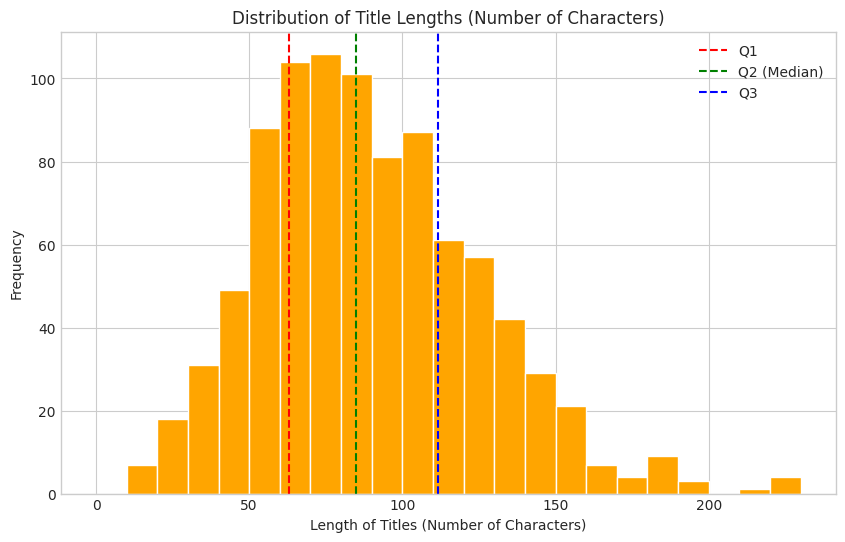

In [23]:
len_chr_title = corpus_df['TITLE'].map(lambda x: len(x))

# Calculate quartiles
q1 = np.percentile(len_chr_title, 25)
q2 = np.percentile(len_chr_title, 50)
q3 = np.percentile(len_chr_title, 75)

# Define histogram properties
fig = plt.figure(figsize=(10, 6))
bin_width = 10
list_bins= list(range(0, len_chr_title.max() + bin_width, bin_width))

# Plot histogram
plt.hist(len_chr_title, bins=list_bins, ec='w', color='orange')

# Add quartile lines
plt.axvline(q1, color='r', linestyle='--', label='Q1')
plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='b', linestyle='--', label='Q3')

plt.xlabel('Length of Titles (Number of Characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Title Lengths (Number of Characters)')

# Add legend
plt.legend()

plt.xticks(np.arange(0, len_chr_title.max() + 1, 50))


plt.show()

In [24]:
corpus_df[corpus_df['TITLE'].map(lambda x: len(x)) < 20]

,index,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE
30,1933,21277668,Body Weight,Obesidad y corazón,El exceso de peso es el factor de riesgo de en...,"(Obesity, Sleep Apnea, Obstructive, Body Compo..."
110,4413,22959179,"Death, Sudden",Muerte súbita,La muerte súbita probablemente sea el desafío ...,"(Age Factors, Arrhythmias, Cardiac, Humans, Ca..."
390,12594,16476271,Pigmentation Disorders,Prurigo pigmentoso,El prurigo pigmentoso es una dermatosis inflam...,"(Adult, Humans, Prurigo, Female, Pigmentation ..."
413,13278,16476271,Prurigo,Prurigo pigmentoso,El prurigo pigmentoso es una dermatosis inflam...,"(Adult, Humans, Prurigo, Female, Pigmentation ..."
545,15623,27033437,"Thrombocythemia, Essential",Inhibidores de JAK2,La inhibición farmacológica de la actividad ci...,"(Pyrazoles, Janus Kinase 2, Protein Kinase Inh..."
551,15855,21835391,Tongue Diseases,Xantoma basilingual,Los xantomas son tumores benignos dismetabólic...,"(Adult, Humans, Tongue Diseases, Xanthomatosis..."
870,22030,27033437,Primary Myelofibrosis,Inhibidores de JAK2,La inhibición farmacológica de la actividad ci...,"(Pyrazoles, Janus Kinase 2, Protein Kinase Inh..."


Some titles are discovered to be identical to the text of the Mesh Major topic.

The tokenization of titles will be addressed in the upcoming cells

In [25]:
random.seed(123)

index_random = random.randint(0, corpus_df.shape[0])
print('index:', index_random)

title_A = corpus_df.loc[index_random, 'TITLE']
print(f'A sample title:\n{title_A}')

index: 53
A sample title:
Edades de sedestación y marcha en recién nacidos pretérmino menores de 1. 500 gr con displasia broncopulmonar


In [26]:
tokenizer = BertTokenizerFast.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

/home/juanluisgonzalez/.local/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [27]:
print(tokenizer.tokenize(title_A))

['Edad', '##es', 'de', 'sedes', '##tación', 'y', 'marcha', 'en', 'recién', 'nacidos', 'pre', '##té', '##r', '##mino', 'menores', 'de', '1', '.', '500', 'gr', 'con', 'disp', '##las', '##ia', 'bron', '##co', '##pul', '##mon', '##ar']


In [28]:
print(tokenizer.encode_plus(title_A))

{'input_ids': [4, 12800, 1019, 1008, 24869, 1755, 1042, 5103, 1036, 9064, 18462, 1245, 2868, 30936, 18619, 5934, 1008, 1094, 1009, 4624, 11162, 1051, 14004, 1372, 1255, 9643, 1180, 3858, 1979, 1018, 5], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [29]:
# Get the title encoded
title_A_tk = tokenizer.encode_plus(title_A)['input_ids']

# Decode the title
title_A_decoded = tokenizer.decode(title_A_tk)
print(f'Title decoded:\n{title_A_decoded}')

# Original title
print(f'Title original:\n{title_A}')

2024-05-09 13:32:49.488015: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 13:32:49.551826: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 13:32:49.553505: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 13:32:50.765899: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Title decoded:
[CLS] Edades de sedestación y marcha en recién nacidos pretérmino menores de 1. 500 gr con displasia broncopulmonar [SEP]
Title original:
Edades de sedestación y marcha en recién nacidos pretérmino menores de 1. 500 gr con displasia broncopulmonar


The length of the titles tokenized will be covered.

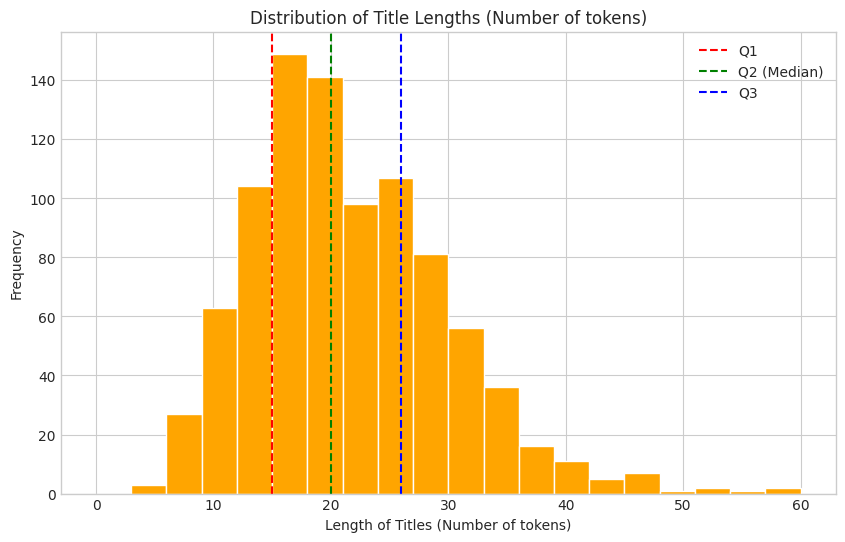

In [30]:
len_tk_title = corpus_df['TITLE'].map(lambda x: len(tokenizer.tokenize(x)))

# Calculate quartiles
q1 = np.percentile(len_tk_title, 25)
q2 = np.percentile(len_tk_title, 50)
q3 = np.percentile(len_tk_title, 75)

# Define histogram properties
fig = plt.figure(figsize=(10, 6))
bin_width = 3
list_bins= list(range(0, len_tk_title.max() + bin_width, bin_width))

# Plot histogram
plt.hist(len_tk_title, bins=list_bins, ec='w', color='orange')

# Add quartile lines
plt.axvline(q1, color='r', linestyle='--', label='Q1')
plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='b', linestyle='--', label='Q3')

plt.xlabel('Length of Titles (Number of tokens)')
plt.ylabel('Frequency')
plt.title('Distribution of Title Lengths (Number of tokens)')

# Add legend
plt.legend()

plt.xticks(np.arange(0, len_tk_title.max() + 1, 10))

plt.show()

# ABSTRACT

In [31]:
corpus_df['ABSTRACT']

0      Objetivo Conocer la prevalencia de pacientes c...
1      Objetivo Evaluar la evidencia disponible respe...
2      Objetivo Para mejorar el manejo de pacientes p...
3      Se ha desarrollado un agrupador de morbilidad ...
4      Objetivo Traducir y adaptar transculturalmente...
                             ...                        
905    Introducción La eyaculación precoz puede deber...
906    Recientemente se ha propuesto una nueva clasif...
907    La eyaculación consta de 2 fases sucesivas: a)...
908    La aproximación biomédica a la eyaculación pre...
909    Las estrategias, recomendaciones y técnicas pr...
Name: ABSTRACT, Length: 910, dtype: object

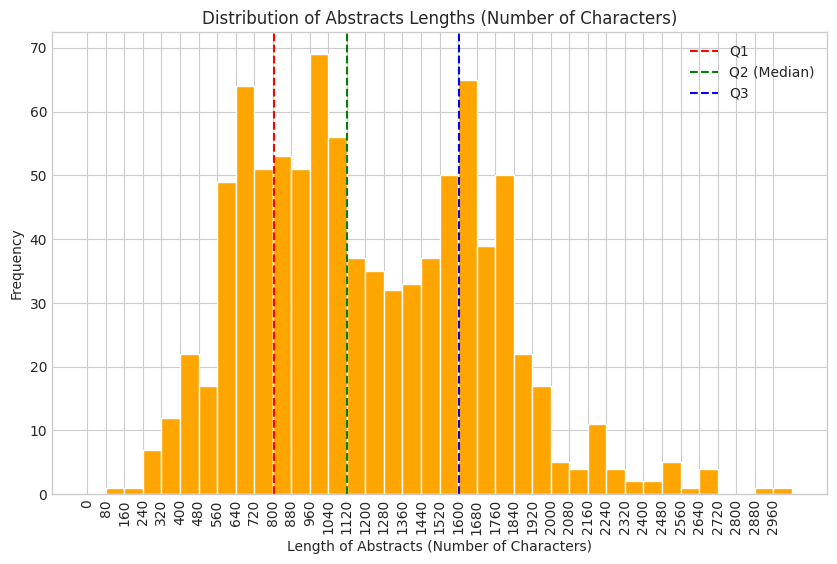

In [32]:
len_chr_abstract = corpus_df['ABSTRACT'].map(lambda x: len(x))

# Calculate quartiles
q1 = np.percentile(len_chr_abstract, 25)
q2 = np.percentile(len_chr_abstract, 50)
q3 = np.percentile(len_chr_abstract, 75)

# Define histogram properties
fig = plt.figure(figsize=(10, 6))
bin_width = 80
list_bins= list(range(0, len_chr_abstract.max() + bin_width, bin_width))

# Plot histogram
plt.hist(len_chr_abstract, bins=list_bins, ec='w', color='orange')

# Add quartile lines
plt.axvline(q1, color='r', linestyle='--', label='Q1')
plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='b', linestyle='--', label='Q3')

plt.xlabel('Length of Abstracts (Number of Characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Abstracts Lengths (Number of Characters)')

# Add legend
plt.legend()

plt.xticks(np.arange(0, len_chr_abstract.max() + 1, 80), rotation=90)


plt.show()

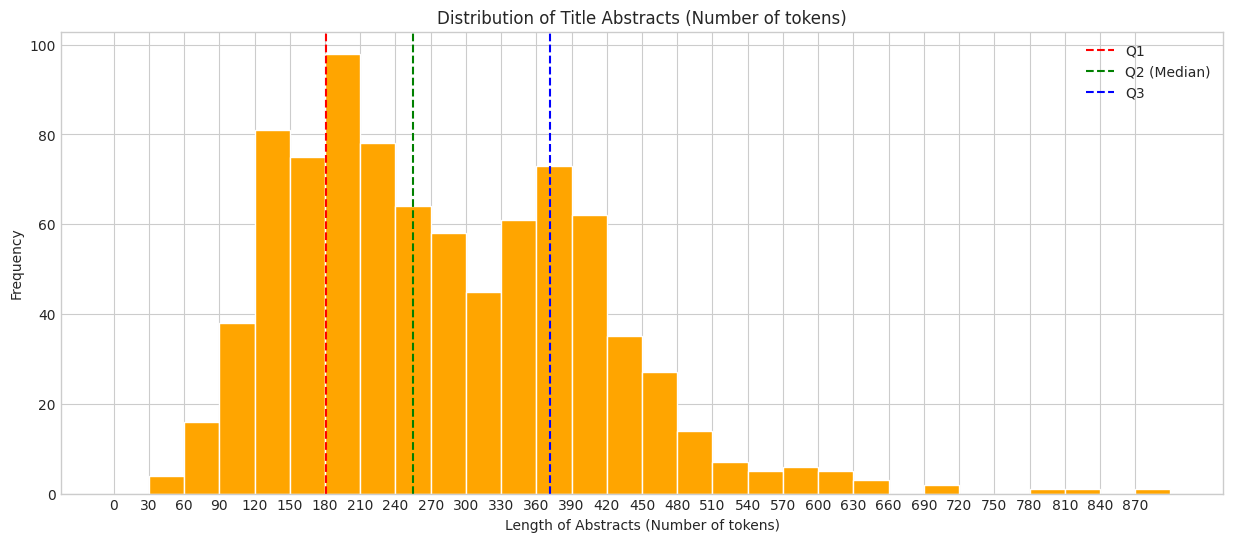

In [46]:
len_tk_abstract = corpus_df['ABSTRACT'].map(lambda x: len(tokenizer.tokenize(x)))

# Calculate quartiles
q1 = np.percentile(len_tk_abstract, 25)
q2 = np.percentile(len_tk_abstract, 50)
q3 = np.percentile(len_tk_abstract, 75)

# Define histogram properties
fig = plt.figure(figsize=(15, 6))
bin_width = 30
list_bins= list(range(0, len_tk_abstract.max() + bin_width, bin_width))

# Plot histogram
plt.hist(len_tk_abstract, bins=list_bins, ec='w', color='orange')

# Add quartile lines
plt.axvline(q1, color='r', linestyle='--', label='Q1')
plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='b', linestyle='--', label='Q3')

plt.xlabel('Length of Abstracts (Number of tokens)')
plt.ylabel('Frequency')
plt.title('Distribution of Title Abstracts (Number of tokens)')

# Add legend
plt.legend()

plt.xticks(np.arange(0, len_tk_abstract.max() + 1, 30))

plt.show()